# (Highly Biased) review of Julia Packages for economists

Pablo Winant

Friday, 10 March 2017

RBA

## Packages

Huge ecosystem: http://pkg.julialang.org/pulse.html

Based on Git/Github:

- packages are repositories
- a package = module + files + scripts

Three types of packages:

- shipped (in [JuliaPro](http://juliacomputing.com/products/juliapro.html)) 
- registered (see [METADATA.jl](https://github.com/JuliaLang/METADATA.jl)): install with `Pkg.add()`
- unregistered: install with  `Pkg.clone()`

## A small list of useful packages:

*nonlinear optimization / minimization*

- Roots
- Optim
- NLSolve (*)

*interpolation*

- Interpolations (*)
- BasisMatrices (*)
- splines.jl (**)

*Statistics*

- DataFrames
- Distributions
- GLM
- MultivariateStats (*)

*Plotting libraries*

- Gadfly
- PyPlot
- Plots (*)
- Plotly / PlotlyJS (*)

*Formal calculation*

- Calculus
- SymEngine
- ForwardDiff (*)

*Modeling*
- Dolang (**)
- Dolo (**)
- Dyno (**)

See [ucidatascienceinitiative](http://ucidatascienceinitiative.github.io/IntroToJulia/) for a more data-oriented introduction.

## Exercise 0: discover Juno

Test Juno:

- atom features: 

    - command palette (ctrl+shift+p), multiple cursors, plugins
    
- juno features:

    - enable workspace (default layout)
    - julia console (command line integration)
    - progressbar
    - debugger

## Exercise 1: basic package management

- list all installed packages
- find directory of installed packages
- inspect content of package QuantEcon
- install test and remove (registered package) Crayons.jl
- install (unregistered) Dolang.jl

## Exercise 2: a (tiny) bit of statistics

- Create a simple random DataFrame with the following columns (N=100 observations):

    - x and y random, z = 0.5*x + 0.5 y
    - $x$ and $y$ correlated (use Distributions.jl)

- Compute descriptive statistics

(for those who have a good connection):

- Load the LifeCycleSavings database from RData using RDatasets.jl.
    
    - use GLM.jl to regress SR on Pop15, Pop75, DPI, DDPI using OLS

## Solution

In [12]:
import DataFrames
N = 100
col1 = rand(N)
col2 = rand(N);
df = DataFrames.DataFrame(x=col1, y=col2);
df[:z] = df[:x] + df[:y];

In [13]:
# Base.rand does not do multivariate laws.
import Distributions
Sigma = [0.9 0.1; 0.1 0.85]
mu = [0.0, 0.0]
mvn = Distributions.MvNormal(mu, Sigma)

FullNormal(
dim: 2
μ: [0.0,0.0]
Σ: [0.9 0.1; 0.1 0.85]
)


In [14]:
typeof(mvn)

Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}

In [15]:
methods(Distributions.rand)

# 116 methods for generic function "rand":
rand{T<:Union{Bool,Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(rd::RandomDevice, ::Type{T}) at random.jl:52
rand(rng::RandomDevice, ::Type{Base.Random.Close1Open2}) at random.jl:56
rand(rng::RandomDevice, ::Type{Base.Random.CloseOpen}) at random.jl:59
rand{I<:Base.Random.FloatInterval}(r::MersenneTwister, ::Type{I}) at random.jl:122
rand{T<:Union{Bool,Int16,Int32,Int8,UInt16,UInt32,UInt8}}(r::MersenneTwister, ::Type{T}) at random.jl:267
rand(r::MersenneTwister, ::Type{UInt64}) at random.jl:270
rand(r::MersenneTwister, ::Type{UInt128}) at random.jl:275
rand(r::MersenneTwister, ::Type{Int64}) at random.jl:281
rand(r::MersenneTwister, ::Type{Int128}) at random.jl:282
rand(s::StatsBase.RandIntSampler) at /home/pablo/.julia/v0.5/StatsBase/src/rand.jl:13
rand(d::Distributions.DiscreteUniform) at /home/pablo/.julia/v0.5/Distributions/src/univariate/discrete/discreteuniform.jl:131
rand(d::Distributions.Hypergeometric) at /home/pablo/.julia/v0.5/Distributions/src/univariate/discrete/hypergeometric.jl:72
rand(d::Distributions.Kolmogorov) at /home/pablo/.julia/v0.5/Distributions/src/univariate/continuous/kolmogorov.jl:102
rand(d::Distributions.EmpiricalUnivariateDistribution) at /home/pablo/.julia/v0.5/Distributions/src/empirical.jl:67
rand(s::Distributions.CategoricalDirectSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/categorical.jl:14
rand(s::Distributions.AliasTable) at /home/pablo/.julia/v0.5/Distributions/src/samplers/categorical.jl:44
rand(s::Distributions.BinomialRmathSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/binomial.jl:7
rand(s::Distributions.BinomialGeomSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/binomial.jl:56
rand(s::Distributions.BinomialTPESampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/binomial.jl:141
rand(s::Distributions.BinomialAliasSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/binomial.jl:247
rand(s::Distributions.BinomialPolySampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/binomial.jl:276
rand(s::Distributions.PoissBinAliasSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/poissonbinomial.jl:21
rand(s::Distributions.PoissonRmathSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/poisson.jl:6
rand(s::Distributions.PoissonCountSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/poisson.jl:28
rand(s::Distributions.PoissonADSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/poisson.jl:58
rand(s::Distributions.ExponentialSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/exponential.jl:5
rand(s::Distributions.ExponentialLogUSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/exponential.jl:11
rand(s::Distributions.GammaRmathSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/gamma.jl:6
rand(s::Distributions.GammaGDSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/gamma.jl:70
rand(s::Distributions.GammaGSSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/gamma.jl:156
rand(s::Distributions.GammaMTSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/gamma.jl:193
rand(s::Distributions.VonMisesSampler) at /home/pablo/.julia/v0.5/Distributions/src/samplers/vonmises.jl:19
rand(d::Distributions.UnivariateGMM) at /home/pablo/.julia/v0.5/Distributions/src/mixtures/unigmm.jl:28
rand(s::Distributions.UnivariateGMMSampler) at /home/pablo/.julia/v0.5/Distributions/src/mixtures/unigmm.jl:38
rand() at random.jl:227
rand(T::Type) at random.jl:228
rand(dims::Tuple{Vararg{Int64,N<:Any}}) at random.jl:229
rand(dims::Integer...) at random.jl:230
rand(T::Type, dims::Tuple{Vararg{Int64,N<:Any}}) at random.jl:231
rand(T::Type, d1::Integer, dims::Integer...) at random.jl:232
rand(r::AbstractArray) at random.jl:235
rand(r::AbstractArray, dims::Tuple{Vararg{Int64,N<:Any}}) at random.jl:238
rand(r::AbstractArray, dims::Integer...) at random.jl:239
rand(r::Union{MersenneTw

In [16]:
M = Distributions.rand(mvn, N)

2×100 Array{Float64,2}:
 -1.41033  -0.13401   -0.80019  …  -0.0111429  -1.22185  -1.03582 
 -1.09387  -0.672106  -1.35345     -0.698527   -1.26193  -0.769987

In [17]:
df2 = DataFrames.DataFrame(x=M[1,:], y=M[2,:]);
df2[:z] = df2[:x] + df2[:y];

In [18]:
# now descriptive statistics

In [19]:
std(df[:x])

0.2753185297515715

In [20]:
cor(df) # doesn't work

LoadError: MethodError: no method matching cor(::DataFrames.DataFrame)[0m
Closest candidates are:
  cor([1m[31m::DataArrays.DataArray{T,1}[0m, [1m[31m::DataArrays.DataArray{T,1}[0m) at /home/pablo/.julia/v0.5/DataArrays/src/operators.jl:785
  cor{T<:AbstractArray{T,1}}([1m[31m::T<:AbstractArray{T,1}[0m; mean) at statistics.jl:463
  cor{T<:AbstractArray{T,2}}([1m[31m::T<:AbstractArray{T,2}[0m; vardim, mean) at statistics.jl:473
  ...[0m

In [21]:
# let's see what cor is defined for
methods(cor)

# 14 methods for generic function "cor":
cor(dv1::DataArrays.DataArray{T<:Any,1}, dv2::DataArrays.DataArray{T<:Any,1}) at /home/pablo/.julia/v0.5/DataArrays/src/operators.jl:785
cor{T<:AbstractArray{T,1}}(x::T; mean) at statistics.jl:463
cor{T<:AbstractArray{T,2}}(X::T; vardim, mean) at statistics.jl:473
cor(X::AbstractArray{T<:Any,2}; vardim, mean) at deprecated.jl:49
cor(X::AbstractArray{T<:Any,2}, vardim::Int64) at statistics.jl:471
cor(x::AbstractArray{T<:Any,1}; mean) at deprecated.jl:49
cor{T<:AbstractArray{T,1},S<:AbstractArray{T,1}}(x::T, y::S; mean) at statistics.jl:480
cor(x::AbstractArray{T<:Any,1}, Y::AbstractArray{T<:Any,2}) at statistics.jl:491
cor(X::AbstractArray{T<:Any,2}, y::AbstractArray{T<:Any,1}) at statistics.jl:492
cor(X::AbstractArray{T<:Any,2}, Y::AbstractArray{T<:Any,2}) at statistics.jl:493
cor(x::AbstractArray{T<:Any,1}, y::AbstractArray{T<:Any,1}; mean) at deprecated.jl:49
cor(X::Union{AbstractArray{T<:Any,1},AbstractArray{T<:Any,2}}, Y::Union{AbstractArray{T<:Any,1},AbstractArray{T<:Any,2}}; vardim, mean) at deprecated.jl:49
cor(x::Union{AbstractArray{T<:Any,1},AbstractArray{T<:Any,2}}, y::Union{AbstractArray{T<:Any,1},AbstractArray{T<:Any,2}}, vardim::Int64) at statistics.jl:488
cor(d::Distributions.Distribution{Distributions.Multivariate,S<:Distributions.ValueSupport}) at /home/pablo/.julia/v0.5/Distributions/src/multivariates.jl:40

In [22]:
# OK so we need to pass an array: Array(x) converts x to an array
cor(Array(df2))

3×3 Array{Float64,2}:
 1.0       0.20143   0.758693
 0.20143   1.0       0.790919
 0.758693  0.790919  1.0     

Economists experiences with R should try RDatasets, GLM

In [28]:
import RDatasets
LifeCycleSavings = RDatasets.dataset("datasets", "LifeCycleSavings")

,Country,SR,Pop15,Pop75,DPI,DDPI
1,Australia,11.43,29.35,2.87,2329.68,2.87
2,Austria,12.07,23.32,4.41,1507.99,3.93
3,Belgium,13.17,23.8,4.43,2108.47,3.82
4,Bolivia,5.75,41.89,1.67,189.13,0.22
5,Brazil,12.88,42.19,0.83,728.47,4.56
6,Canada,8.79,31.72,2.85,2982.88,2.43
7,Chile,0.6,39.74,1.34,662.86,2.67
8,China,11.9,44.75,0.67,289.52,6.51
9,Colombia,4.98,46.64,1.06,276.65,3.08
10,Costa Rica,10.78,47.64,1.14,471.24,2.8


Library GLM uses a syntax close to R's lm for regressions.

In [31]:
using GLM
fm2 = fit(LinearModel, SR ~ Pop15 + Pop75 + DPI + DDPI, LifeCycleSavings)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: SR ~ 1 + Pop15 + Pop75 + DPI + DDPI

Coefficients:
                 Estimate   Std.Error   t value Pr(>|t|)
(Intercept)       28.5661     7.35452   3.88416   0.0003
Pop15           -0.461193    0.144642  -3.18851   0.0026
Pop75             -1.6915      1.0836    -1.561   0.1255
DPI          -0.000336902 0.000931107 -0.361829   0.7192
DDPI             0.409695    0.196197   2.08818   0.0425


In [32]:
fm2

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: SR ~ 1 + Pop15 + Pop75 + DPI + DDPI

Coefficients:
                 Estimate   Std.Error   t value Pr(>|t|)
(Intercept)       28.5661     7.35452   3.88416   0.0003
Pop15           -0.461193    0.144642  -3.18851   0.0026
Pop75             -1.6915      1.0836    -1.561   0.1255
DPI          -0.000336902 0.000931107 -0.361829   0.7192
DDPI             0.409695    0.196197   2.08818   0.0425


## Exercise 2: plotting

Using PyPlot and/or Gadfly:

- plot $f: x\rightarrow \frac{sin(\epsilon + \frac{a |x|}{\pi})}{\epsilon + \frac{a |x|}{\pi}}$ for different values of a on the same graph (with labels, titles, ...)
- plot a contour plot for $g: x, y\rightarrow \frac{sin(\frac{\sqrt{x^2+y^2}}{\pi})}{\frac{\sqrt{x^2+y^2}}{\pi}}$

- (optional): use Plotly or Plots
- (optional 2):  make a 3d graph for $g(x,y)$ using Plotly

## Solution

In [186]:
epsilon = 0.01
f(x, a) = sin(epsilon + a*sqrt(x^2))/(epsilon + a*sqrt(x^2))
g(x) = sin(epsilon + sqrt(x[1]^2+x[2]^2))/(epsilon + sqrt(x[1]^2+x[2]^2))

g (generic function with 1 method)

In [2]:
xvec = collect(linspace(0,2,1000))
yvec = f.(xvec, 1.0);

Let's use Gadfly

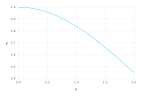

In [7]:
using Gadfly
plot(x=xvec, y=yvec, Geom.line)

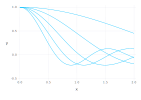

In [14]:
# what if we want to plot many graphs ?
xvec = collect(linspace(0,2,1000))
yvecs = [f.(xvec, a) for a=[1,2,3,4,5]]
layers = [layer(x=xvec, y=yvecs[i], Geom.line) for i=1:length(yvecs)]
plot(layers...)

In [79]:
# but it's easier to construct a dataframe first:
data = vcat(
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 1.0), label="a=1"),
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 2.0), label="a=2"),
    DataFrames.DataFrame(x=xvec,y=f.(xvec, 3.0), label="a=3")
);


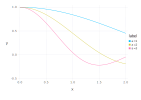

In [80]:
plot(data, x="x", y="y", color=:label, Geom.line)

We can do the same with PyPlot which is a wrapper to the <del>easier</del> more matlabesque library Matplotlib.

In [31]:
import PyPlot
const plt = PyPlot

PyPlot

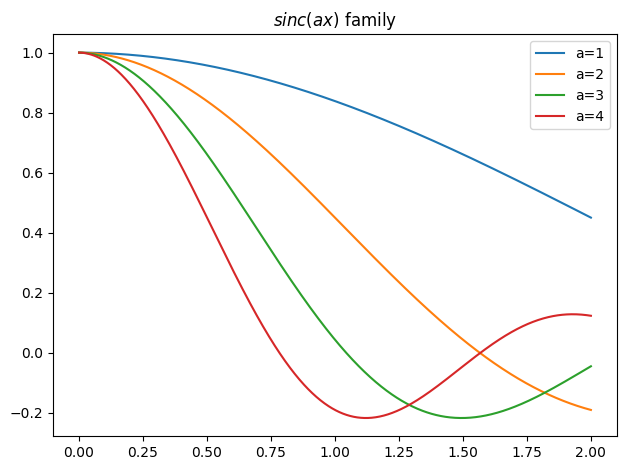

In [55]:
plt.plot(xvec, yvecs[1], label="a=1")
plt.plot(xvec, yvecs[2], label="a=2")
plt.plot(xvec, yvecs[3], label="a=3")
plt.plot(xvec, yvecs[4], label="a=4")
plt.legend()
s = "\$ \sinc(a x) \$ family"
plt.title(s)
plt.tight_layout()

2d plots with PyPlot

In [178]:
M = 10
n = 100
fine_grid = vcat( [ [x y] for x = linspace(-M,M,n), y = linspace(-M,M,n) ]... );
xm = reshape(fine_grid[:,1], n,n)
ym = reshape(fine_grid[:,2], n,n);


In [179]:
vals = [g(fine_grid[i,:]) for i=1:size(fine_grid,1)]
V = reshape(vals, size(xm)...)

100×100 Array{Float64,2}:
  0.0706528     0.0708013    0.0695315   …   0.0708013    0.0706528  
  0.0708013     0.0694898    0.0667418       0.0694898    0.0708013  
  0.0695315     0.0667418    0.0625257       0.0667418    0.0695315  
  0.0668856     0.0626285    0.0569845       0.0626285    0.0668856  
  0.0629331     0.0572483    0.050245        0.0572483    0.0629331  
  0.0577687     0.0507231    0.0424561   …   0.0507231    0.0577687  
  0.0515081     0.0431942    0.0337837       0.0431942    0.0515081  
  0.0442849     0.0348185    0.0244066       0.0348185    0.0442849  
  0.0362466     0.025764     0.014511        0.025764     0.0362466  
  0.02755       0.016205     0.00428653      0.016205     0.02755    
  0.0183579     0.00631832  -0.00607894  …   0.00631832   0.0183579  
  0.00883453   -0.00372117  -0.0164031      -0.00372117   0.00883453 
 -0.000857742  -0.0137443   -0.0265131      -0.0137443   -0.000857742
  ⋮                                      ⋱                      

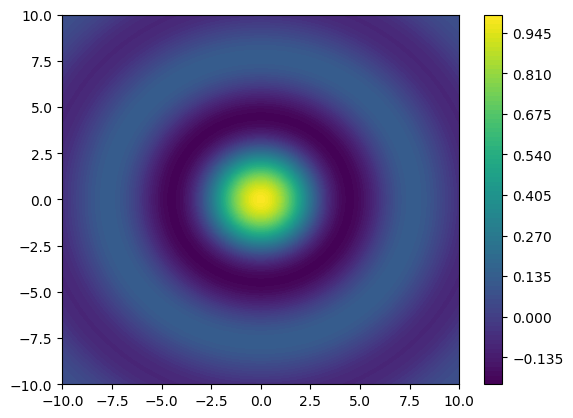

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe64666e780>

In [180]:
contourf(xm,ym,V,100)
colorbar()

## Exercise 3: maximization with Optim.jl

- Use Optim to find the maximum of g, with initial point $x_0=[0.1, 0.1]$
- Use Optim to find the maximum of g, with initial point $x_0=[1.1, 5.1]$


## Solution

In [29]:
sol = Optim.optimize(g, [1.1,5.1])

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [1.1,5.1]
 * Minimizer: [1.593082073982207,7.5584110737523895]
 * Minimum: -1.283746e-01
 * Iterations: 23
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 28

In [39]:
sol0 = Optim.optimize(g, [1.1,5.1], SimulatedAnnealing())
sol = Optim.optimize(g, sol0.minimizer)

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [-0.5779583797350484,7.742900047613241]
 * Minimizer: [-0.578382125763309,7.702589993097577]
 * Minimum: -1.283746e-01
 * Iterations: 22
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 26

## Exercise 4: solving a nonlinear function with Rootls.jl and NLsolve.jl

1. First, we would like to find the smallest root $x_0$ such that $f(x_0)=0$ using Roots.jl
  - find the root $x_0$
  - start from different initial points

2. Now we look for some values $(x_0,y_0)$ such that $g(x_0, y_0)=0$ and $y_0=x_0^2$
  - Define the function which computes the residuals
  - Find a (many solutions) using NLsolve
  - Compute the jacobian with Calculus.jl and use NLSolve with precomputed derivatives
  - (optional: use ForwardDiff.jl)
  - (optional: use Dolang.jl)

## Solution

Let's solve a 1-dimensional function using Roots.

In [184]:
import Roots

INFO: Precompiling module Roots.


In [199]:
Roots.fzero(x->f(x,1.0), 1.0)

3.1315926535897933

In [201]:
xvec = linspace(-10, 10, 100)
zeros = [Roots.fzero(x->f(x,1.0),u0) for u0 in xvec];

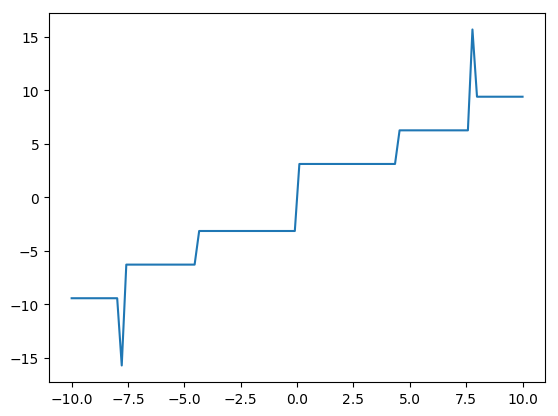

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe64655db38>

In [206]:
plt.plot(xvec, zeros)

Now let's solve $g$ using a nonlinear solver.

In [ ]:
import NLsolve


In [18]:
function residual(z)
    epsilon = 0.0001
    res = zeros(2)
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
    return res
end


  0.000079 seconds (260

 allocations: 15.734 KB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5,0.0]
 * Zero: [1.63739,2.68103]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [19]:
@time sol = NLsolve.nlsolve(NLsolve.not_in_place(residual), [+0.5, 0.0])

  0.000092 seconds (260 allocations: 15.734 KB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5,0.0]
 * Zero: [1.63739,2.68103]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [21]:
#inplace version
function residual!(z, res)
    epsilon = 0.0001
    res = zeros(2)
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
    return res
end

residual! (generic function with 2 methods)

In [22]:
@time sol = NLsolve.nlsolve(residual!, [+0.5, 0.0])

  0.011917 seconds (2.15 k allocations: 102.987 KB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5,0.0]
 * Zero: [0.5,0.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 0
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 1
 * Jacobian Calls (df/dx): 1

We can also use Calculus.jl to perform symbolic differentiation.

In [3]:
import Calculus
Calculus.differentiate("sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))", [:x,:y])

2-element Array{Any,1}:
 :(((((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
 :(((((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)

In [24]:
function residual!(z, res)
    epsilon = 0.0001
    x = z[1]
    y = z[2]
    res[1] = sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))
    res[2] = (y - x^2)
    return res
end
# we copy/paste:
function jacobian!(z, res)
    epsilon = 0.0001
#     res = zeros(2,2)
    x = z[1]
    y = z[2]
    res[1,1] = (((((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2x) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
    res[1,2] = (((((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2))) * cos(epsilon + sqrt(x ^ 2 + y ^ 2))) * (epsilon + sqrt(x ^ 2 + y ^ 2)) - sin(epsilon + sqrt(x ^ 2 + y ^ 2)) * ((2y) * (0.5 / sqrt(x ^ 2 + y ^ 2)))) / (epsilon + sqrt(x ^ 2 + y ^ 2)) ^ 2)
    res[2,1] = -2.0*x
    res[2,2] = 1.0
end

jacobian! (generic function with 1 method)

In [15]:
sol = NLsolve.nlsolve( NLsolve.DifferentiableMultivariateFunction(residual!, jacobian!), [+0.5, 0.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5,0.0]
 * Zero: [1.63739,2.68103]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

Functions can also be created/differentiated with [Dolang.jl](https://github.com/EconForge/Dolang)

In [81]:
import Dolang
import Base

In [82]:
expr = parse("sin(epsilon + sqrt(x^2+y^2))/(epsilon + sqrt(x^2+y^2))")
expr2 = parse("y-x^2")

latex_string = string("\$", Dolang.latex(expr), "\$")
Base.HTML(latex_string)

HTML{String}("\$\\frac{\\text{sin}\\left(\\epsilon+\\text{sqrt}\\left(\\left(x\\right)^{2}+\\left(y\\right)^{2}\\right)\\right)}{\\epsilon+\\text{sqrt}\\left(\\left(x\\right)^{2}+\\left(y\\right)^{2}\\right)}\$")

In [83]:
code = Dolang.make_method([expr, expr2] , [(:x,0),(:y,0)], [:epsilon]; funname=:gg, orders=[0,1])
gg = eval(code)

gg (generic function with 5 methods)

In [84]:
gg(Dolang.Der{0}, [0.0,0.1], [0.00001])

2-element Array{Float64,1}:
 0.998334
 0.1     

In [85]:
gg(Dolang.Der{1}, [0.0,0.1], [0.00001])

2×2 Array{Float64,2}:
  0.0  -0.0333033
 -0.0   1.0      

Dolang allows for more flexibility and supports other types of symbols:

## Exercise 5: solve RBC model with Dolo

- Install Dolo (requires splines.jl and Dolang)

- print/edit rbc model (located at Dolo/examples/models/rbc_dtcc_mc.yaml)
- import model (`yaml_import`)
- solve using `time_iteration`
- (optional) solve using value function iteration (`solve_policy`)
- plot decision rule

In [114]:
import Dolo

In [121]:
cd(Pkg.dir("Dolo", "examples", "models"))

In [124]:
;cat rbc_dtcc_ar1.yaml

name: Real Business Cycle

model_type: dtcc

symbols:

   exogenous: [z]
   states: [k]
   controls: [n, i]
   expectations: [m]
   values: [V]
   parameters: [beta, sigma, eta, chi, delta, alpha, rho, zbar, sig_z]
   rewards: [u]

definitions:
    y: exp(z)*k^alpha*n^(1-alpha)
    c: y - i
    rk: alpha*y/k
    w: (1-alpha)*y/n

equations:

    arbitrage:
        - chi*n^eta*c^sigma - w                      | 0 <= n <= inf
        - 1 - beta*(c/c(1))^(sigma)*(1-delta+rk(1))  | 0 <= i <= inf
        # - V0 = c^(1-sigma)/(1-sigma) - chi*n^(1+eta)/(1+eta) + beta*V0(1) |  -100000<=V0<=100000

    transition:
        - k = (1-delta)*k(-1) + i(-1)

    value:
        - V = c^(1-sigma)/(1-sigma) - chi*n^(1+eta)/(1+eta) + beta*V(1)

    felicity:
        - u =  c^(1-sigma)/(1-sigma) - chi*n^(1+eta)/(1+eta)

    expectation:
        - m = beta/c(1)^sigma*(1-delta+rk(1))

    direct_response:
        - n = ((1-alpha)*exp(z)*k^alpha*m/chi)^(1/(eta+alpha))
        - i = exp(z)*k^alpha*n^(1-alpha)

In [133]:
model = Dolo.yaml_import("rbc_dtcc_iid.yaml")

name,Real Business Cycle
filename,rbc_dtcc_iid.yaml
Type,Equation
direct_response,\[n_{t} = \left(\frac{1-\alpha \text{exp}\left(z_{t}\right) \left(k_{t}\right)^{\alpha} m_{t}}{\chi}\right)^{\frac{1}{\eta+\alpha}}\]
,\[i_{t} = \text{exp}\left(z_{t}\right) \left(k_{t}\right)^{\alpha} \left(n_{t}\right)^{1-\alpha}-\left(m_{t}\right)^{\frac{-1}{\sigma}}\]
value,\[V_{t} = \frac{\left(c\right)^{1-\sigma}}{1-\sigma}-\frac{\chi \left(n_{t}\right)^{1+\eta}}{1+\eta}+\beta V_{t+1}\]
expectation,\[m_{t} = \frac{\beta}{\left(c_{t+1}\right)^{\sigma}} 1-\delta+rk_{t+1}\]
felicity,\[u_{t} = \frac{\left(c\right)^{1-\sigma}}{1-\sigma}-\frac{\chi \left(n_{t}\right)^{1+\eta}}{1+\eta}\]
transition,\[z_{t} = \rho z_{t-1}+e_{zt}\]
,\[k_{t} = 1-\delta k_{t-1}+i_{t-1}\]
arbitrage,\[\chi \left(n_{t}\right)^{\eta} \left(c\right)^{\sigma}-w\]


In [134]:
dr = Dolo.time_iteration(model)

It    SA          gain        nit  
-----------------------------------
0     4.21e+00    NaN         0    
1     6.18e-01    1.47e-01    7    
2     1.58e-01    2.55e-01    4    
3     1.01e-01    6.41e-01    4    
4     7.06e-02    6.98e-01    4    
5     5.19e-02    7.35e-01    4    
6     3.96e-02    7.63e-01    4    
7     3.10e-02    7.84e-01    3    
8     2.48e-02    8.00e-01    3    
9     2.02e-02    8.13e-01    3    
10    1.66e-02    8.25e-01    3    
11    1.39e-02    8.34e-01    3    
12    1.17e-02    8.43e-01    3    
13    9.94e-03    8.50e-01    3    
14    8.63e-03    8.68e-01    3    
15    7.80e-03    9.04e-01    3    
16    7.03e-03    9.01e-01    3    
17    6.32e-03    8.99e-01    2    
18    5.69e-03    9.01e-01    2    
19    5.15e-03    9.04e-01    2    
20    4.67e-03    9.07e-01    2    
21    4.25e-03    9.09e-01    2    
22    3.87e-03    9.11e-01    2    
23    3.53e-03    9.13e-01    2    
24    3.23e-03    9.14e-01    2    
25    2.96e-03    9.16e-01  

Dolo.DecisionRule{Dolo.EmptyGrid,Dolo.CartesianGrid}(Dolo.EmptyGrid(),Dolo.CartesianGrid([-0.0533333,4.67749],[0.0533333,14.0325],[5,50],[-0.0533333 4.67749; -0.0266667 4.67749; … ; 0.0266667 14.0325; 0.0533333 14.0325]),2,Array{Float64,N}[
[0.435219 0.438612 … 0.451312 0.454253; 0.204446 0.231054 … 0.341964 0.370805]

[0.428331 0.431751 … 0.444602 0.447597; 0.201951 0.228767 … 0.340627 0.369745]

[0.421444 0.424889 … 0.437891 0.440941; 0.199456 0.226479 … 0.33929 0.368686]

...

[0.265662 0.269434 … 0.284172 0.287759; 0.0887838 0.121553 … 0.259059 0.295055]

[0.263946 0.267709 … 0.282411 0.285989; 0.0867833 0.119607 … 0.257322 0.293368]

[0.26223 0.265985 … 0.280651 0.284219; 0.0847828 0.11766 … 0.255584 0.291681]])

In [135]:
drc = Dolo.ConstantDecisionRule(model.calibration[:controls])
@time dr0, drv0 = Dolo.solve_policy(model, drc);

Evaluating initial policy
It    SA          
--------------
1     4.42e+00    
2     4.11e+00    
3     3.85e+00    
4     3.64e+00    
5     3.46e+00    
6     3.31e+00    
7     3.18e+00    
8     3.06e+00    
9     2.95e+00    
10    2.86e+00    
11    2.77e+00    
12    2.69e+00    
13    2.62e+00    
14    2.55e+00    
15    2.49e+00    
16    2.43e+00    
17    2.38e+00    
18    2.32e+00    
19    2.28e+00    
20    2.23e+00    
21    2.18e+00    
22    2.14e+00    
23    2.10e+00    
24    2.06e+00    
25    2.02e+00    
26    1.99e+00    
27    1.95e+00    
28    1.92e+00    
29    1.88e+00    
30    1.85e+00    
31    1.82e+00    
32    1.79e+00    
33    1.76e+00    
34    1.74e+00    
35    1.71e+00    
36    1.68e+00    
37    1.66e+00    
38    1.63e+00    
39    1.61e+00    
40    1.59e+00    
41    1.56e+00    
42    1.54e+00    
43    1.52e+00    
44    1.50e+00    
45    1.48e+00    
46    1.46e+00    
47    1.44e+00    
48    1.42e+00    
49    1.40e+00    
50    1.3

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in #OptimizationOptions#74(::Array{Any,1}, ::Function) at ./deprecated.jl:50
 in (::Optim.#kw##OptimizationOptions)(::Array{Any,1}, ::Optim.#OptimizationOptions) at ./<missing>:0
 in #solve_policy#94(::Bool, ::Function, ::Dolo.NumericModel{Symbol("##Real Business Cycle#366"),Dolo.MvNormal}, ::Dolo.ConstantDecisionRule) at /home/pablo/.julia/v0.5/Dolo/src/algos/value_iteration.jl:172
 in solve_policy(::Dolo.NumericModel{Symbol("##Real Business Cycle#366"),Dolo.MvNormal}, ::Dolo.ConstantDecisionRule) at /home/pablo/.julia/v0.5/Dolo/src/algos/value_iteration.jl:112
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/pablo/.julia/v0.5/IJulia/src/execute_request.jl:157
 in eventloop(::ZMQ.Socket) at /home/pablo/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading In[135], in expression starting on line 184


It: 1 ; SA: 2.3086871175355554 ; SA_x: 0.3900962814947243 ; (nit) 0
    It: 1 ; SA: 1.5063862669273647
    It: 2 ; SA: 1.031531177026494
    It: 3 ; SA: 0.7317887118877024
    It: 4 ; SA: 0.5335683727672915
    It: 5 ; SA: 0.39769530252087293
    It: 6 ; SA: 0.3018217240324077
    It: 7 ; SA: 0.23256590780138708
    It: 8 ; SA: 0.1815715225814074
    It: 9 ; SA: 0.14340561800213436
    It: 10 ; SA: 0.11445013083928757
    It: 11 ; SA: 0.09222112245834069
    It: 12 ; SA: 0.07498329812577254
    It: 13 ; SA: 0.0614965880226066
    It: 14 ; SA: 0.05086260514102037
    It: 15 ; SA: 0.042419743798774334
    It: 16 ; SA: 0.035675003713436126
    It: 17 ; SA: 0.03025663794150546
    It: 18 ; SA: 0.025881573241917977
    It: 19 ; SA: 0.02233227716925512
    It: 20 ; SA: 0.019813132704683767
    It: 21 ; SA: 0.017804454254445545
    It: 22 ; SA: 0.016056754778816185
    It: 23 ; SA: 0.014538755794802682
    It: 24 ; SA: 0.013222234296051738
    It: 25 ; SA: 0.012081866589738866
    It: 26 ; SA

(Dolo.DecisionRule{Dolo.EmptyGrid,Dolo.CartesianGrid}(Dolo.EmptyGrid(),Dolo.CartesianGrid([-0.0533333,4.67749],[0.0533333,14.0325],[5,50],[-0.0533333 4.67749; -0.0266667 4.67749; … ; 0.0266667 14.0325; 0.0533333 14.0325]),2,Array{Float64,N}[
[0.439877 0.44306 … 0.45265 0.454695; 0.212741 0.239115 … 0.344563 0.371712]

[0.430173 0.433422 … 0.445237 0.448047; 0.205226 0.231784 … 0.341861 0.370644]

[0.420469 0.423783 … 0.437824 0.441399; 0.197711 0.224454 … 0.33916 0.369576]

...

[0.266011 0.269729 … 0.284715 0.288423; 0.0898667 0.122478 … 0.260862 0.29728]

[0.264322 0.267871 … 0.282379 0.286152; 0.0879712 0.120117 … 0.257212 0.293904]

[0.262634 0.266013 … 0.280042 0.283881; 0.0860756 0.117757 … 0.253563 0.290529]]),Dolo.DecisionRule{Dolo.EmptyGrid,Dolo.CartesianGrid}(Dolo.EmptyGrid(),Dolo.CartesianGrid([-0.0533333,4.67749],[0.0533333,14.0325],[5,50],[-0.0533333 4.67749; -0.0266667 4.67749; … ; 0.0266667 14.0325; 0.0533333 14.0325]),1,Array{Float64,N}[
[-233.771 -232.936 … -229.596 -2

In [141]:
model.calibration.flat[:k]

9.354978290145986

In [149]:
k_min = model.options.grid.a[2]
k_max = model.options.grid.b[2]
kvec = linspace(k_min, k_max)
vals = vcat([dr([0,i])' for i in kvec]...)

50×2 Array{Float64,2}:
 0.438359  0.283233
 0.431618  0.281361
 0.425173  0.27942 
 0.419026  0.277466
 0.413145  0.275485
 0.407513  0.273488
 0.402112  0.271475
 0.396924  0.269449
 0.391937  0.267414
 0.387136  0.26537 
 0.382511  0.263321
 0.378049  0.261267
 0.373742  0.259211
 ⋮                 
 0.29626   0.207071
 0.294145  0.205157
 0.292073  0.20325 
 0.290042  0.201352
 0.288051  0.19946 
 0.286099  0.197577
 0.284183  0.195702
 0.282304  0.193834
 0.280459  0.191974
 0.278649  0.190121
 0.276871  0.188278
 0.275124  0.186438

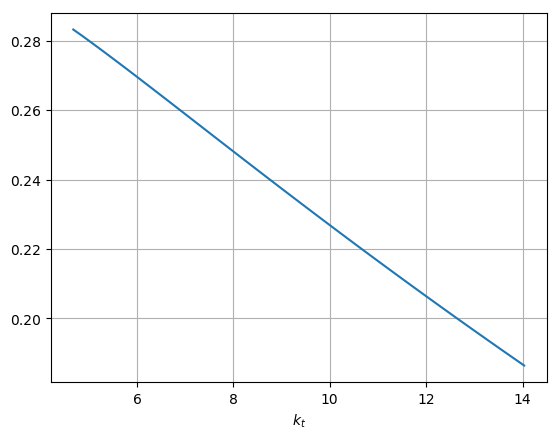

In [154]:
plt.plot(kvec, vals[:,2])
plt.xlabel("\$k_t\$")
plt.grid()

# Excercise 6

Try Dyno with docker. (ask your IT friend about docker)

Run  `docker run -p 8888:8888 albop/donolab` 

or ` docker run -v your_directory:/home/dynosaur/models/ -p 8888:8888 albop/donolab`

Import and solve a modfile.